In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [113]:
x_data=np.linspace(0.0,10.0,1000000)


## y=mx+b
y=0.5x+5

In [114]:
noise=np.random.randn(len(x_data))
y_true=0.5*x_data+5+noise

In [115]:
X=pd.DataFrame(data=x_data,columns=(['X_data']))
y_data=pd.DataFrame(data=y_true,columns=(['Y_true']))

In [116]:
dataset=pd.concat([X,y_data],axis=1)

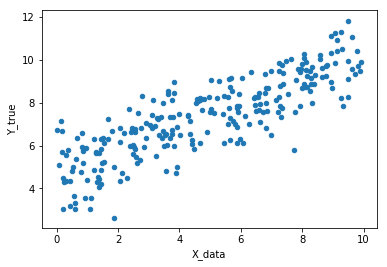

In [117]:
dataset.sample(n=250).plot(kind='scatter',x='X_data',y='Y_true')

In [125]:
w=tf.Variable(.08)
b=tf.Variable(-1.0)
xph=tf.placeholder(tf.float32,shape=[batch_size])
yph=tf.placeholder(tf.float32,shape=[batch_size])

In [126]:
y_pred=w*xph+b
batch_size=8

In [127]:
init=tf.global_variables_initializer()
error=tf.reduce_sum(tf.square(yph-y_pred))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [129]:
with tf.Session() as sess:
    sess.run(init)
    n_iter=1000
    for i in range(n_iter):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    final_w,final_b=sess.run([w,b])    

In [131]:
print(final_w)


0.5507787


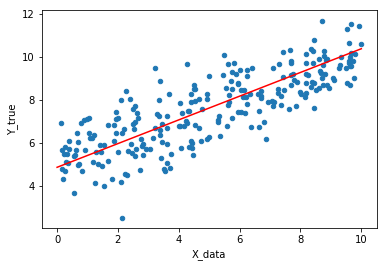

In [134]:
dataset.sample(250).plot(kind='scatter',x='X_data',y='Y_true')
plt.plot(x_data,x_data*final_w+final_b,'r')